In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [92]:
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target

In [93]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [94]:
x.shape

(569, 30)

In [95]:
arr = np.ones((569,1))

In [96]:
x = np.append(x,arr,axis=1)

In [97]:
x.shape

(569, 31)

In [98]:
x = x.T

In [99]:
x.shape

(31, 569)

In [100]:
# compute hypothesis (sigmoid function)
def compute_hypothesis(params,x):
    z = np.dot(params.T,x)
    predictions = 1/(1+np.exp(-z))
    return predictions

In [101]:
# # predict classes
# def predict_classes(predictions):
#     predicted_classes = np.zeros(len(predictions))
#     predicted_classes[np.where(predictions>=0.5)] = 1
#     return predicted_classes

In [102]:
# # calculate accuracy
# def calculate_accuracy(class_predictions, actual):
#     accuracy = (sum(class_predictions==actual)/len(actual))*100
#     return accuracy

In [103]:
# cost function
def compute_cost(predictions, actual):
    m = len(actual)
    log_of_predictions = np.log(predictions)
    log_of_oneMinusPredictions = np.log(1-predictions)
    cost = -(1/m)*np.sum(((actual*log_of_predictions)) + 
                        ((1-actual)*(log_of_oneMinusPredictions))) 
    return cost

In [104]:
# gradient descent
def gradient_descent(x,y,learning_rate,iteration):
    actual = y
    costs = []
    params = np.zeros(x.shape[0])
    m = len(actual)
    
    for i in range(iterations):
        predictions = compute_hypothesis(params,x)
        costs.append(compute_cost(predictions,actual))
        errors = predictions - actual
        gradients = (1/m)*np.dot(x,errors)
        params = params - (learning_rate*gradients)
    
    return params, costs

In [105]:
learning_rate = 0.00000001
iterations = 1000
params, costs, accuracies = gradient_descent(x,y,learning_rate, iterations)

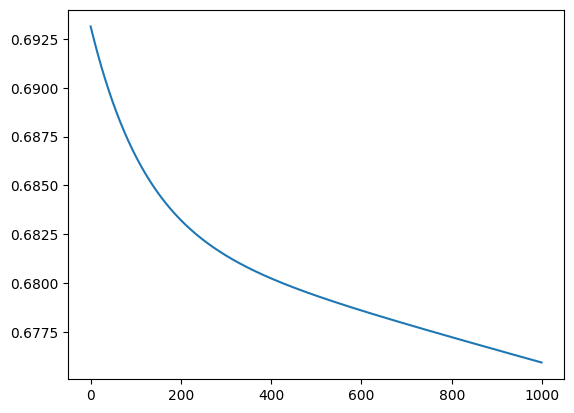

In [106]:
plt.plot(np.arange(1000),costs)